Label        AFF   NFF  Total
HospitalID                   
1            0.0  23.0   23.0
2            3.0   0.0    3.0
3           12.0  23.0   35.0
4            0.0   2.0    2.0
5            5.0  60.0   65.0
...          ...   ...    ...
63           0.0   8.0    8.0
64           0.0  32.0   32.0
65           2.0   8.0   10.0
66           5.0  17.0   22.0
67           7.0  29.0   36.0

[66 rows x 3 columns]


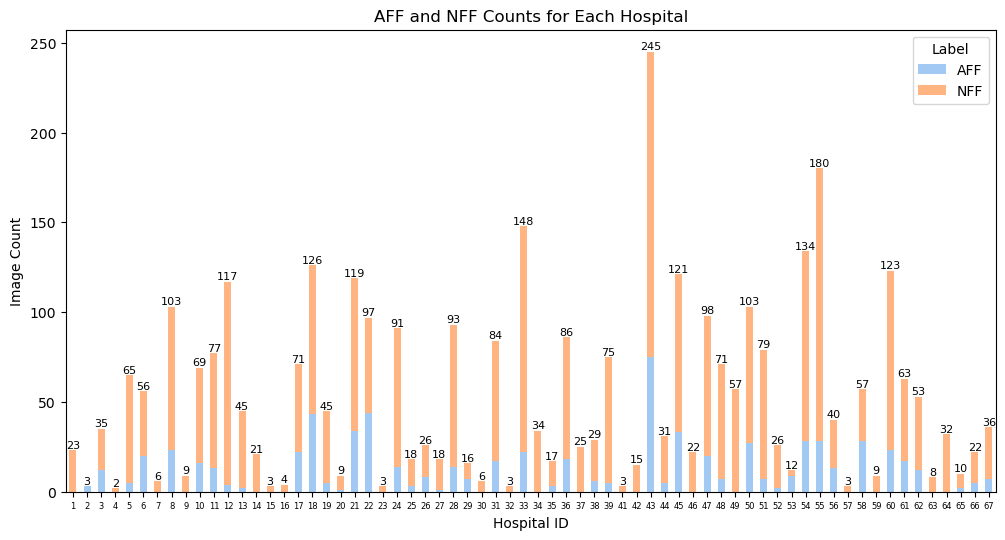

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 读取CSV文件
file_path = '/local/data1/honzh073/local_repo/FL/code/2_patient_level/image_data.csv'
data = pd.read_csv(file_path)

# 过滤掉HospitalID为100的数据
filtered_data = data[data['HospitalID'] != 100]

# 根据医院ID和标签进行分组，并统计图片数量
hospital_label_counts = filtered_data.groupby(['HospitalID', 'Label']).size().unstack().fillna(0)

# 计算AFF和NFF的总数
hospital_label_counts['Total'] = hospital_label_counts['AFF'] + hospital_label_counts['NFF']

# 打印每个医院的AFF和NFF数量
print(hospital_label_counts)

# 设置Seaborn调色板
sns.set_palette("pastel")


# 生成条形图
ax = hospital_label_counts[['AFF', 'NFF']].plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Hospital ID')
plt.ylabel('Image Count')
plt.title('AFF and NFF Counts for Each Hospital')
plt.xticks(rotation=0, fontsize=6)  # 调整X轴标签的字体大小
plt.legend(title='Label')

# 在每个条形上方显示AFF和NFF的数量，并调整字体大小
for idx, (aff, nff, total) in enumerate(zip(hospital_label_counts['AFF'], hospital_label_counts['NFF'], hospital_label_counts['Total'])):
    ax.text(idx, total, int(total), ha='center', va='bottom', fontsize=8)  # 在每个条形上方显示总数，字体大小为8
    # ax.text(idx, aff, str(aff), ha='center', va='bottom', fontsize=1)  # 在AFF条形上方显示AFF数量
    # ax.text(idx, total - nff, str(nff), ha='center', va='bottom', fontsize=8)  # 在NFF条形上方显示NFF数量

plt.show()


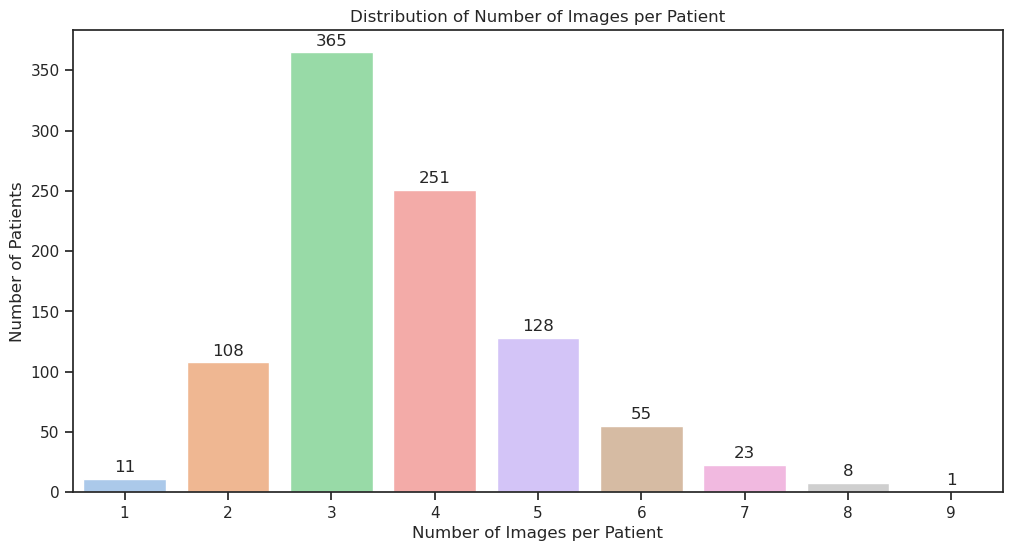

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 读取CSV文件
file_path = '/local/data1/honzh073/local_repo/FL/code/2_patient_level/image_data.csv'
data = pd.read_csv(file_path)

# 过滤掉HospitalID为100的数据
filtered_data = data[data['HospitalID'] != 100]

# 按PatientID分组并计算每个患者的图片数量
patient_image_counts = filtered_data.groupby('PatientID').size().reset_index(name='Image Count')

# 设置绘图风格
sns.set(style="ticks")

# 绘制柱形图
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Image Count', data=patient_image_counts, palette="pastel")

# 在每个柱形上显示患者数量
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 8), textcoords='offset points')

plt.xlabel('Number of Images per Patient')
plt.ylabel('Number of Patients')
plt.title('Distribution of Number of Images per Patient')
plt.show()


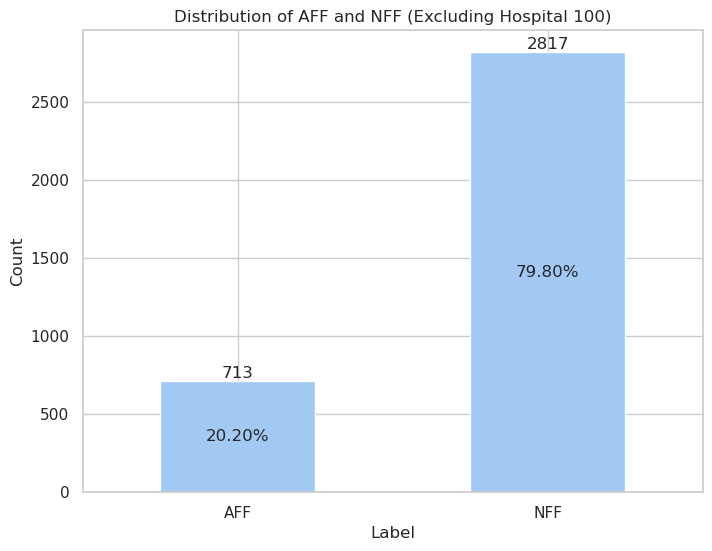

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 读取CSV文件
file_path = '/local/data1/honzh073/local_repo/FL/code/2_patient_level/image_data.csv'
data = pd.read_csv(file_path)

# 过滤掉HospitalID为100的数据
filtered_data = data[data['HospitalID'] != 100]

# 按照标签分组并计算AFF和NFF的数量
label_counts = filtered_data.groupby('Label').size()

# 计算比例
label_proportions = label_counts / label_counts.sum()

# 设置绘图风格
sns.set(style="whitegrid")
sns.set_palette("pastel")

# 绘制条形图
plt.figure(figsize=(8, 6))
ax = label_counts.plot(kind='bar', label='Count')
ax.set_ylabel('Count')
ax.set_xlabel('Label')
ax.set_title('Distribution of AFF and NFF')
# ax.legend(loc='upper right')

# 在每个条形中间显示比例
for idx, (count, proportion) in enumerate(zip(label_counts, label_proportions)):
    ax.annotate(f'{proportion:.2%}', (idx, count / 2), ha='center', va='center')  # 显示比例
    ax.annotate(str(count), (idx, count), ha='center', va='bottom')  # 显示数量

plt.xticks(rotation=0)  # 使X轴标签水平显示
plt.show()
